In [ ]:
# Basic Deep Learning - NN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# Load dataset



In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data


(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Check Sample Data

Label 0
Data Image [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153

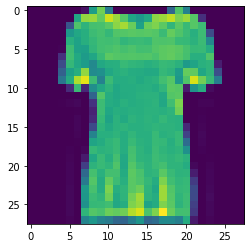

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_images[10])

print('Label', training_labels[10])
print('Data Image', training_images[10])

Data Image [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.69165705e-04
  2.18377547e-03 3.07574010e-03 1.63014225e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.30718954e-03 2.84505959e-03
  1.72241446e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.33756248e-03 3.29104191e-03
  3.33717801e-03 2.98346790e-03 3.62937332e-03 3.32179931e-03
  2.87581699e-03 2.29142637e-03 2.07612457e-03 2.35294118e-03
  3.24490581e-03 3.33717801e-03 3.55247982e-03 3.15263360e-03
  3.33717801e-03 2.89119569e-03 5.22875817e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.01499423e-03 2.84505959e-03 2.55286428

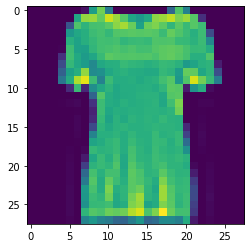

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

print("Data Image", training_images[10])
plt.imshow(training_images[10])


# Build the Model

In [ ]:
# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Definisi:
1. **Sequential**: Mendedinisikan urutan lapisan dalam jaringan NN
2. **Flatten**   : Mengubah gambar menjadi satu dimensi. Ingat bahwa gambar kita berbentuk persegi 28x28 diubah menjadi 784x1
3. **Dense**     : menambahkan lapisan neuron

Setiap lapisan neuron membutuhkan fungsi aktivasi untuk memberi tahu neuron mana yang mengandung informasi
1. **Relu**      : jika x>0 mengembalikan x, jika tidak mengembalikan 0
2. **Softmax**   : mengambil satu set nilai, lalu memilih nilai yang terbesar. Misalnya pada output layer, NN mengembalikan nilai `[0.1, 0.2, 0.5, 0.1, 0.1, 8.5, 0.5, 0.1]` maka softmax akan mengubahnya menjadi `[ 0, 0, 0, 0, 1, 0]`

Selanjutnya adalah membungkus model yang akan didefinisikan sebelumnya.
Ketika proses compile, kita menambahkan optimizer dan loss function

In [ ]:
# Compile model

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
tf.random.set_seed(50)

In [ ]:
%%time

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2109 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2018 - accuracy: 0.9240
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1955 - accuracy: 0.9249
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1890 - accuracy: 0.9275
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1799 - accuracy: 0.9308
CPU times: user 32.5 s, sys: 3.82 s, total: 36.3 s
Wall time: 31.8 s


In [ ]:
# evaluasi model
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.4585 - accuracy: 0.8369


[0.4585208594799042, 0.836899995803833]

# Eksplorasi

## Latihan 1

In [ ]:
classification = model.predict(test_images)

# melihat hasil prediksi dari indeks ke-n
print(classification[9])

[1.2109477e-06 1.2456541e-06 1.3159992e-06 6.5695122e-06 7.6311089e-06
 9.8842513e-03 4.2808151e-06 9.8897588e-01 8.1248314e-04 3.0520349e-04]


In [ ]:
print(test_labels[9])

7


# Latihan 2

Mencoba nilai yang berbeda untuk dense layer

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)


In [ ]:
%%time

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4683 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3574 - accuracy: 0.8700
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3219 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8957
CPU times: user 32 s, sys: 3.78 s, total: 35.8 s
Wall time: 41.5 s


# Latihan 3

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)

train model

# Latihan 4

Mengubah nilai pada output layer, misal ganti menjadi 5 neuron

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)

In [ ]:
%%time

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
CPU times: user 26.8 s, sys: 3.27 s, total: 30.1 s
Wall time: 41.5 s


### Latihan 5

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)


In [ ]:
%%time

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4932 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3320 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8916
CPU times: user 27.7 s, sys: 3.53 s, total: 31.2 s
Wall time: 41.5 s


## Latihan 6

Kita akan mencoba dampak epochs terhadap proses pelatihan model

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)

In [ ]:
%%time

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5019 - accuracy: 0.8238
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8638
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3409 - accuracy: 0.8752
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3154 - accuracy: 0.8839
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8898
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8995
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9042
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2500 - accuracy: 0.9069
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

# Latihan 7

Saat melatih dengan banyak epoch, kita tidak ingin model kita stuck. Dari pada kita menunggu keseluruhan pelatihan dengan jumlah epoch yang banyak, kita ingin model kita berhenti belajar ketika akurasi / loss mencapai nilai yang telah ditentukan.

Kita akan terapkan `callback`

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print('\nSudah sampai akurasi 90%, stop training!')
      self.model.stop_training = True

callback = myCallback()

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Mendefinisikan model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.random.set_seed(50)

In [ ]:
%%time

model.fit(training_images, training_labels, epochs=30, callbacks=[callback])

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5019 - accuracy: 0.8238
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8638
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3409 - accuracy: 0.8752
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3154 - accuracy: 0.8839
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8898
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8995
Epoch 8/30
1865/1875 [============================>.] - ETA: 0s - loss: 0.2571 - accuracy: 0.9044
Sudah sampai akurasi 90%, stop training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9042
CPU times: user 41.9 s, sys: 5.41 s, total: 47.3 s
Wall 